# Data Science for Business - Assignment 3

# Cleaning the Data and Model Evaluation: Loan Default Case Study
---


### ZHU HUIYUN

References:

1- Loan Default Dataset by M Yasser H: https://www.kaggle.com/datasets/yasserh/loan-default-dataset  Uploaded under CC0 licence.

2- Exercise 3

3- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn


1- Import the dataset and check if there are missing values. How many null values do we have in each column? Are they explicit or implicit? Show the distribution of all null values in a relevant plot.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Assignment_3.csv' )

Mounted at /content/drive


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_amount                55000 non-null  int64  
 1   loan_limit                 53729 non-null  object 
 2   rate_of_interest           41560 non-null  float64
 3   Upfront_charges            40356 non-null  float64
 4   submission_of_application  54933 non-null  object 
 5   Gender                     55000 non-null  object 
 6   Credit_Worthiness          55000 non-null  object 
 7   Credit_Score               55000 non-null  int64  
 8   Status                     55000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 3.8+ MB


In [3]:
data.isnull().sum()

loan_amount                      0
loan_limit                    1271
rate_of_interest             13440
Upfront_charges              14644
submission_of_application       67
Gender                           0
Credit_Worthiness                0
Credit_Score                     0
Status                           0
dtype: int64

null values number:  loan_limit 1271, rate_of_interest 13440, Upfront_charges:14644, submission_of_application: 67

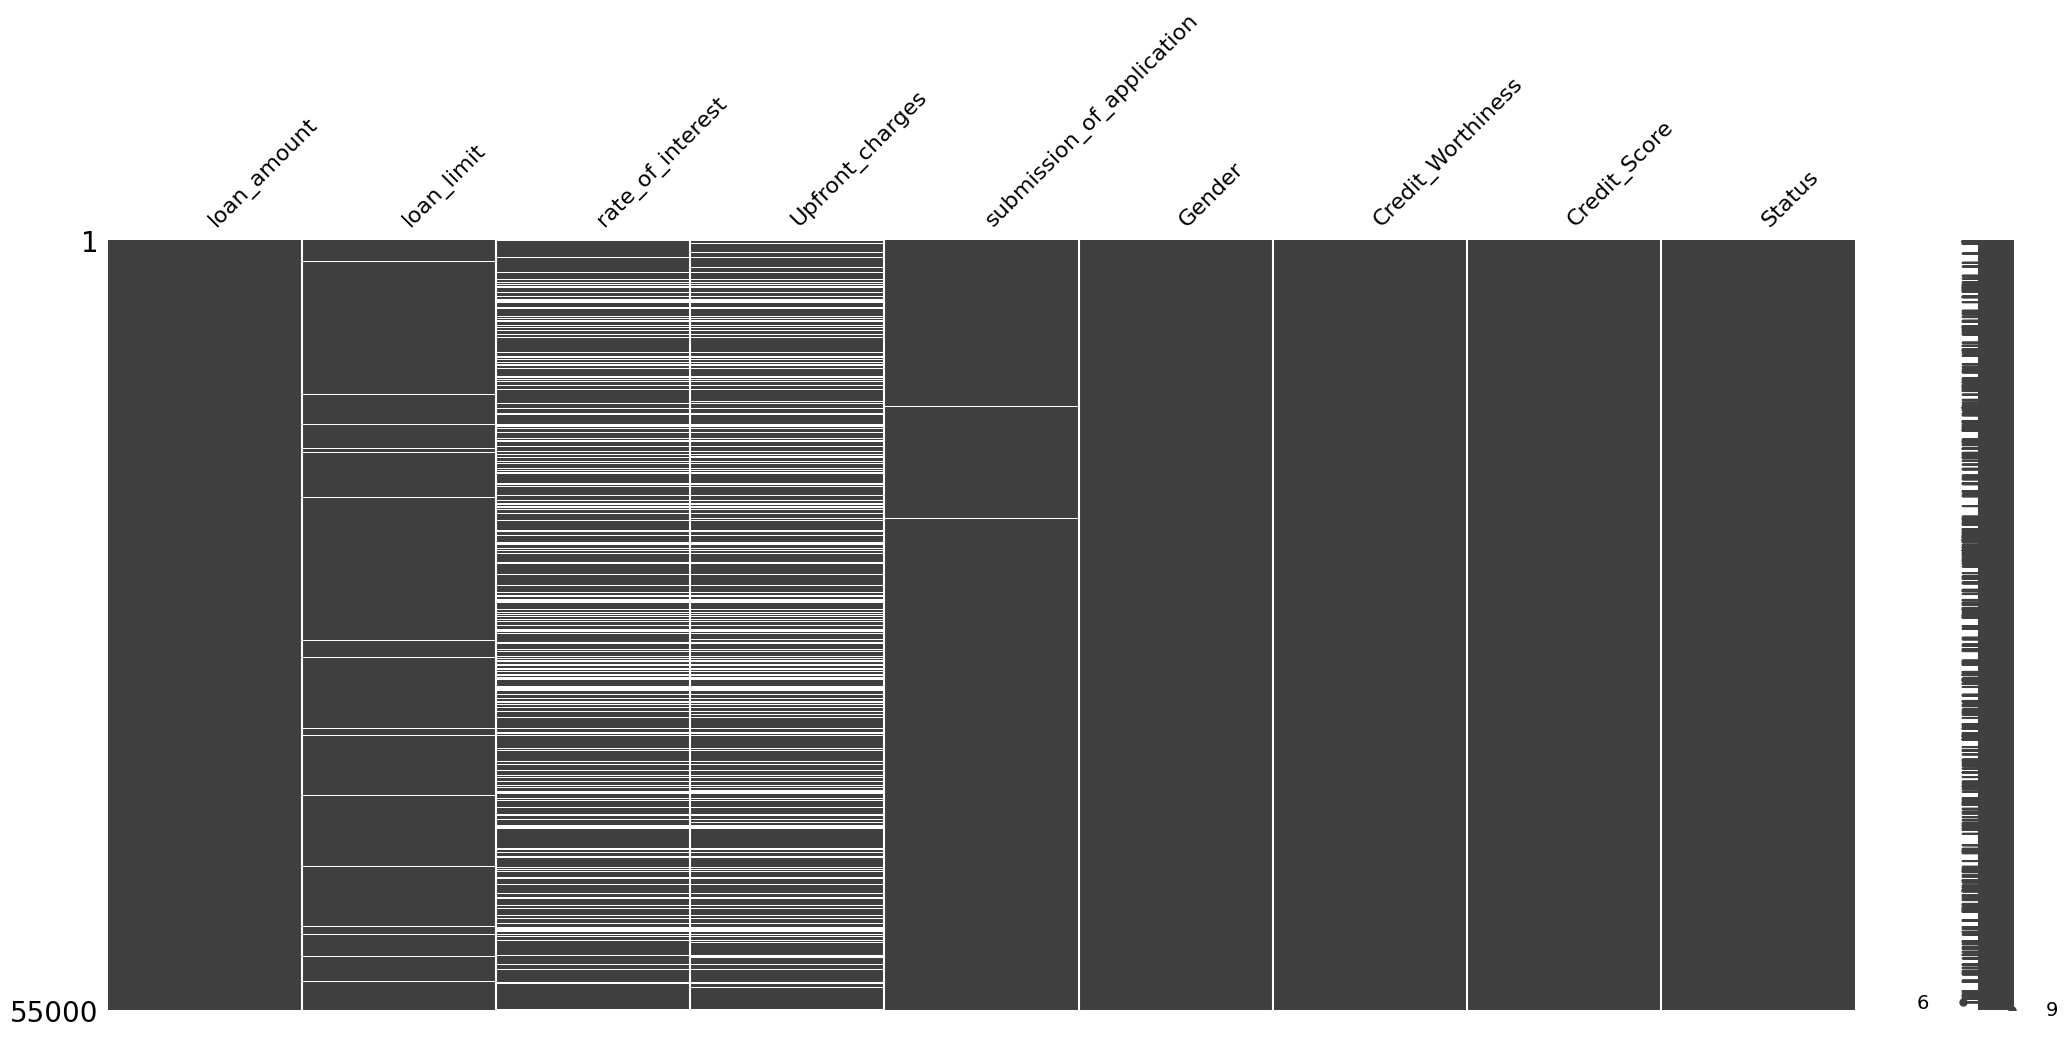

<Figure size 1300x1000 with 0 Axes>

In [4]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data)
plt.figure(figsize = (13,10))
plt.show()

The white parts are the explicit missing value. The minimun completeness shows that three are some rows that just contain data from 6 columns and the rest are missing.

2- Use a proper method of imputation and clean the dataset from null values. Describe the method that you chose. Show in another relevant plot that this imputed dataset is clean of null values.

In [5]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = data[numerical_columns]
numerical_data.isnull().sum()

loan_amount             0
rate_of_interest    13440
Upfront_charges     14644
Credit_Score            0
Status                  0
dtype: int64

As we can see, there are 2 indicators witht missing values among the numerical columns, To fill those missing cells, We use K nearest neighbour imputer.  In mu implementation, I use 3 neighbors for imputation.

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed_numerical_data = imputer.fit_transform(numerical_data)

In [7]:
imputed_numerical_data = pd.DataFrame(imputed_numerical_data, columns=numerical_columns)

In [8]:
imputed_numerical_data.isnull().sum()

loan_amount         0
rate_of_interest    0
Upfront_charges     0
Credit_Score        0
Status              0
dtype: int64

As we can see, there are no numerical missing values in the output, let's have a look on the categorical indicators.

In [9]:
imputed_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amount       55000 non-null  float64
 1   rate_of_interest  55000 non-null  float64
 2   Upfront_charges   55000 non-null  float64
 3   Credit_Score      55000 non-null  float64
 4   Status            55000 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_data = data[categorical_columns]

In [11]:
categorical_data.isnull().sum()

loan_limit                   1271
submission_of_application      67
Gender                          0
Credit_Worthiness               0
dtype: int64

As we can see, there are two categorical indicators with explicit missing values.

In [12]:
for i in range(len(categorical_columns)):
    print(categorical_columns[i],data[categorical_columns[i]].unique())

loan_limit ['cf' 'ncf' nan]
submission_of_application ['to_inst' 'not_inst' nan]
Gender ['No Gender Info' 'Non-binary' 'Female' 'Male']
Credit_Worthiness ['l1' 'l2']


As we can see, we have 'No Gender Info' In Gender column that indicate implicit missing values.

In [13]:
import numpy as np

data['Gender'] = data['Gender'].replace('No Gender Info', np.nan)
categorical_data = data[categorical_columns]

In [14]:
categorical_data.isnull().sum()

loan_limit                    1271
submission_of_application       67
Gender                       14001
Credit_Worthiness                0
dtype: int64

We see that we have 3 categorical indicators with missing values indeed.

In [15]:
imputed_categorical_data = categorical_data

for i in categorical_columns:
    mode = categorical_data[i].mode()
    mode = mode[0]
    imputed_categorical_data[i].fillna(value=mode, inplace=True)

<ipython-input-15-6c89b9a0ff6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_categorical_data[i].fillna(value=mode, inplace=True)
<ipython-input-15-6c89b9a0ff6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_categorical_data[i].fillna(value=mode, inplace=True)
<ipython-input-15-6c89b9a0ff6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_categorical_data[i].fillna(value=mode, inplace=True)
<ipython-inpu

In [16]:
imputed_categorical_data.isnull().sum()

loan_limit                   0
submission_of_application    0
Gender                       0
Credit_Worthiness            0
dtype: int64

In [17]:
imputed_categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_limit                 55000 non-null  object
 1   submission_of_application  55000 non-null  object
 2   Gender                     55000 non-null  object
 3   Credit_Worthiness          55000 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [18]:
imputed_data = pd.concat([imputed_categorical_data, imputed_numerical_data], axis=1, join='inner')

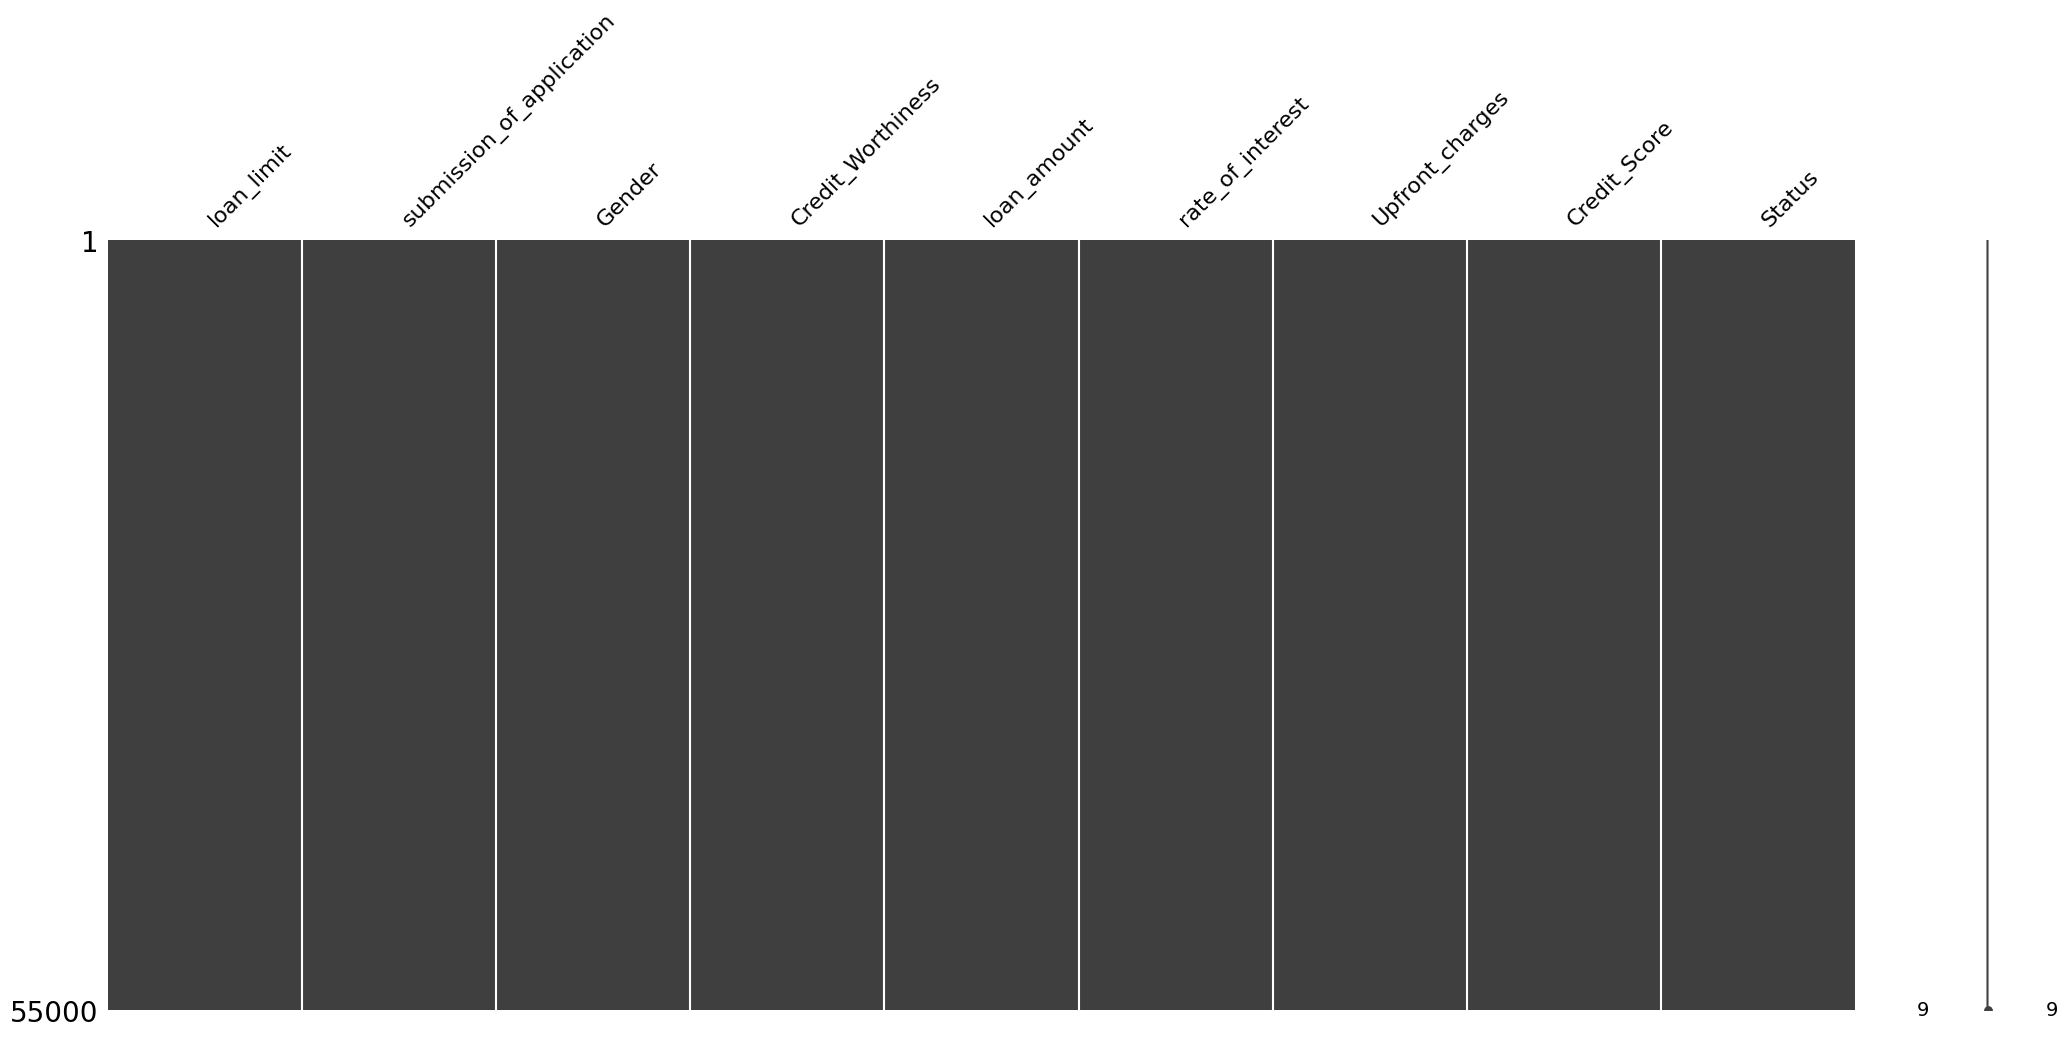

<Figure size 1300x1000 with 0 Axes>

In [19]:
msno.matrix(imputed_data)
plt.figure(figsize = (13,10))
plt.show()

In [20]:
imputed_data.head()

,loan_limit,submission_of_application,Gender,Credit_Worthiness,loan_amount,rate_of_interest,Upfront_charges,Credit_Score,Status
0,cf,to_inst,Male,l1,416500.0,3.990000,3240.230000,802.0,0.0
1,cf,to_inst,Non-binary,l1,226500.0,2.975000,460.000000,755.0,0.0
2,cf,not_inst,Female,l1,366500.0,4.083333,5427.583333,657.0,1.0
3,cf,to_inst,Male,l1,96500.0,4.705000,1994.720000,751.0,1.0
4,cf,to_inst,Male,l2,156500.0,4.490000,3035.250000,504.0,0.0


3- Divide the dataset into a training subset and a testing subset. Fit a Decision Tree Classifier and a Random Forest Classifier on the training subset and evaluate them on the testing subset using a 50% confidence threshold. Which model performs better in this case? Does it mean that the model is a better model in general? Describe.

In [21]:
imputed_encoded_categorical_data = pd.get_dummies(imputed_categorical_data)

In [22]:
imputed_encoded_categorical_data.head()

,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,Gender_Female,Gender_Male,Gender_Non-binary,Credit_Worthiness_l1,Credit_Worthiness_l2
0,1,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,1,1,0
2,1,0,1,0,1,0,0,1,0
3,1,0,0,1,0,1,0,1,0
4,1,0,0,1,0,1,0,0,1


In [23]:
imputed_data = pd.concat([imputed_encoded_categorical_data, imputed_numerical_data], axis=1, join='inner')

In [26]:
imputed_data.head()

,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,Gender_Female,Gender_Male,Gender_Non-binary,Credit_Worthiness_l1,Credit_Worthiness_l2,loan_amount,rate_of_interest,Upfront_charges,Credit_Score,Status
0,1,0,0,1,0,1,0,1,0,416500.0,3.990000,3240.230000,802.0,0.0
1,1,0,0,1,0,0,1,1,0,226500.0,2.975000,460.000000,755.0,0.0
2,1,0,1,0,1,0,0,1,0,366500.0,4.083333,5427.583333,657.0,1.0
3,1,0,0,1,0,1,0,1,0,96500.0,4.705000,1994.720000,751.0,1.0
4,1,0,0,1,0,1,0,0,1,156500.0,4.490000,3035.250000,504.0,0.0


In [35]:
from sklearn.model_selection import train_test_split

imputed_data.columns = imputed_data.columns.astype(str)

train_set, test_set = train_test_split(imputed_data, test_size=0.2, random_state=8)

y_train = train_set['Status']
X_train = train_set.drop(columns=['Status'])
y_test = test_set['Status']
X_test = test_set.drop(columns=['Status'])

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X=X_train, y=y_train);

model_dt = DecisionTreeClassifier()
model_dt.fit(X=X_train, y=y_train);

In [37]:
model_dt.score(X=X_test, y=y_test)

0.9412727272727273

In [38]:
model_rf.score(X=X_test, y=y_test)

0.8963636363636364

.We see that deicision tree calssifier provides a better accuracy than the random forest classifier. However, the score function uses a default 0.5 confidence threshold for evaluation and it does not help us to check the effectivness of our model in other confidence threshold in case we need a more conservative or permissive model.

4- Plot the ROC plot of both models and compare them with a random classifier by describing the plot. Calculate the AUC of the Random Forest Classifier. Can you calculate AUC for Decision Tree Classifier as well? Why?

In [40]:
model_rf_probs = model_rf.predict_proba(X_test)
model_rf_probs = model_rf_probs[:, 1]

In [41]:
model_dt_probs = model_dt.predict_proba(X_test)
model_dt_probs = model_dt_probs[:, 1]

<ipython-input-42-6acab5b0e046>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(model_dt_fpr, model_dt_tpr, 's', marker='o',color='darkorange', label='Decision Tree Classifier')


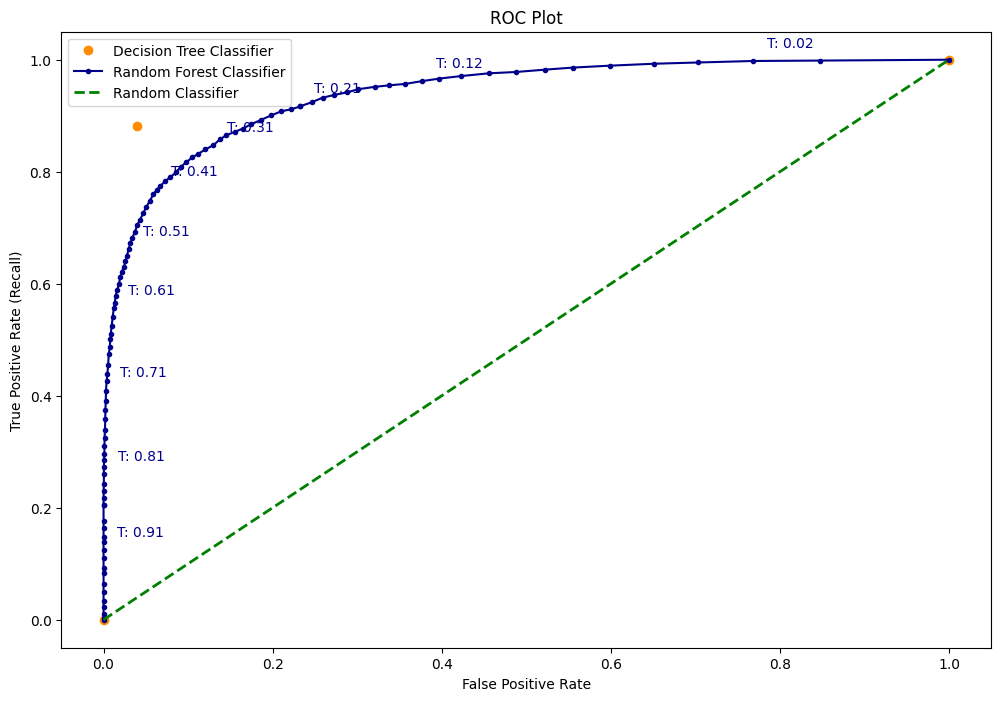

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

model_dt_fpr, model_dt_tpr, _ = roc_curve(y_test, model_dt_probs)
model_rf_fpr, model_rf_tpr, model_rf_thresholds = roc_curve(y_test, model_rf_probs)

plt.figure(figsize=(12, 8))
plt.plot(model_dt_fpr, model_dt_tpr, 's', marker='o',color='darkorange', label='Decision Tree Classifier')
plt.plot(model_rf_fpr, model_rf_tpr, marker='.',color='darkblue', label='Random Forest Classifier')
for i in range(0, len(model_rf_thresholds), len(model_rf_thresholds)//10):
    if 1>=model_rf_thresholds[i]>=0:
      plt.annotate(f'T: {model_rf_thresholds[i]:.2f}', (model_rf_fpr[i], model_rf_tpr[i]),color='darkblue', textcoords="offset points", xytext=(10,10), ha='left')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--', label='Random Classifier')


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score

model_rf_auc = roc_auc_score(y_test, model_rf_probs)

print( model_rf_auc)

0.938983591273448


The AUC of the Random Forest Classifier is 0.9389

In [50]:
from sklearn.metrics import roc_auc_score

model_rf_auc = roc_auc_score(y_test, model_dt_probs)

print( model_rf_auc)

0.9208234925713166


The AUC for Decision Tree Classifier is 0.9208, The ROC curve, and by extension AUC, evaluates classifiers based on their rank-ordering of predictions, not the absolute values. This means that even if a classifier doesn't output well-calibrated probability values, it can still have a high AUC if it ranks positive instances higher than negative instances. Decision Trees, like any other classifiers, rank instances based on their likelihood of belonging to the positive class, so AUC is a relevant metric for them.

In [43]:
from sklearn.metrics import classification_report

threshold = 0.5
predicted_classes = (model_rf_probs >= threshold).astype(int)
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      8359
         1.0       0.87      0.67      0.76      2641

    accuracy                           0.90     11000
   macro avg       0.89      0.82      0.85     11000
weighted avg       0.90      0.90      0.89     11000



In [44]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, predicted_classes)

print(CM)

[[8094  265]
 [ 866 1775]]


In [45]:
TN, FP, FN, TP = CM.ravel()

TPR = TP / (TP + FN)

print("True Positive Rate:", TPR)

FPR = FP / (FP + TN)

print("False Positive Rate:", FPR)

True Positive Rate: 0.672093903824309
False Positive Rate: 0.03170235674123699


5- Your employer asks you to make a permissive model to recognize people who may have loan default. She wants to recognize loan default suspects with a high confidence, even if it comes with a cost. Define a confidence threshold for one of your classifiers and prepare proofs to show that your model satisfies your employer.

In [46]:
threshold = 0.1

predicted_classes = (model_rf_probs >= threshold).astype(int)

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73      8359
         1.0       0.42      0.97      0.59      2641

    accuracy                           0.67     11000
   macro avg       0.70      0.77      0.66     11000
weighted avg       0.85      0.67      0.69     11000



In [47]:
CM = confusion_matrix(y_test, predicted_classes)

print(CM)

[[4823 3536]
 [  77 2564]]


In [48]:
TN, FP, FN, TP = CM.ravel()

TPR = TP / (TP + FN)

print("True Positive Rate:", TPR)

FPR = FP / (FP + TN)

print("False Positive Rate:", FPR)

True Positive Rate: 0.970844377129875
False Positive Rate: 0.4230171073094868


6- There is another model available called XGBoost that can provide proper classifications. Implement the model and compare its effectiveness with your random forest classifier for different confidence thresholds. Which method of comparison did you choose? Describe the reason. You can search to find how to import XGBoost in Python.

In [51]:
!pip install xgboost


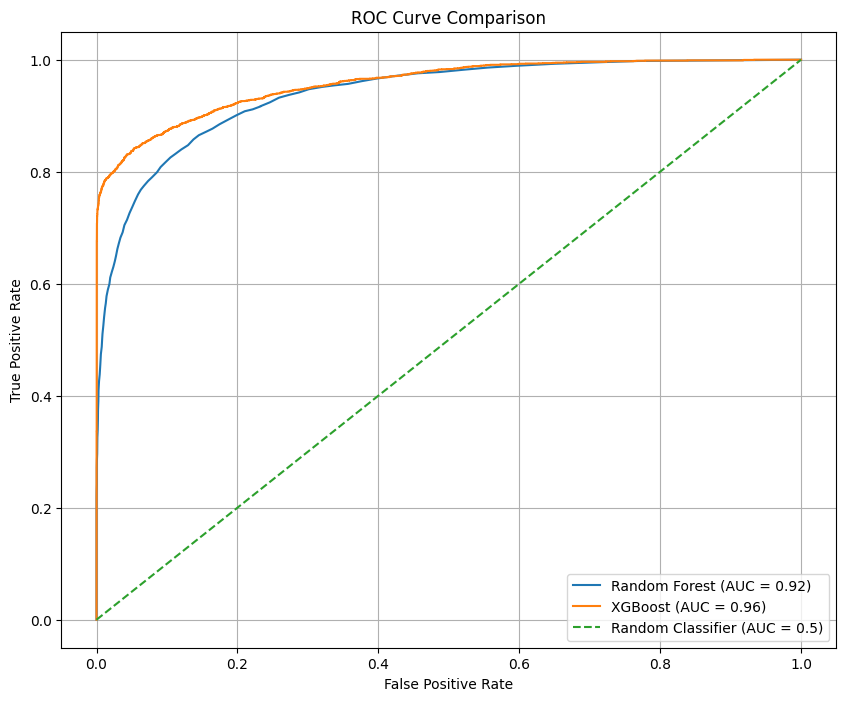

(0.9576727911278246, 0.9208234925713166)

In [57]:
import xgboost as xgb
# Train the XGBoost classifier

model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Get predicted probabilities for the test set from XGBoost
xgb_probs = model_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve metrics for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Calculate AUC for XGBoost
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot the ROC curve for Random Forest, XGBoost, and a random classifier
plt.figure(figsize=(10, 8))
plt.plot(model_rf_fpr, model_rf_tpr, label=f'Random Forest (AUC = {model_rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

xgb_auc, model_rf_auc

I will use XGBoost model, it has the higher AUC:0.96. The model is closer to the top left ponit is stronger whiich can provide more true positive predicition without having many false positive predicitions.

## Do not forget to download the IPython notebook and submit it on Moodle before November 2nd midnight. Please do not forget to indicate the online sources that you used and the people with whom you discussed the assignment (if any). No sharing of the code is allowed.
